## Ineuron Machine Learning Project

## Stock Price Prediction

## Exploratory Data Analysis

In [2]:
import yfinance as yf

from yahooquery import search

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from datetime import date, timedelta

import plotly.graph_objects as go

import plotly.express as px

from plotly.subplots import make_subplots 



In [35]:
import warnings
warnings.filterwarnings('ignore')

In [6]:

# Create a Ticker object for the desired stock
ticker_symbol = 'AAPL'  # Example: Apple Inc.
ticker = yf.Ticker(ticker_symbol)


## Loading the Data

In [9]:
def load_data(ticker):
    try:
        # Retrieve historical data nad returns as DataFrame
        tick=yf.Ticker(ticker)
        historical_data = yf.download(ticker_symbol,period="max")  # You can adjust the period as needed
        
        if historical_data.empty:
            print("Wrong Ticker Name or Stock Not Found")
            #comp=input("Enter The Company Name to Search Ticker")   
            #search_comp(comp)
        else:       
            #converting to Alternate Variable
             df=historical_data
            
             #printing the first 3 Columns
             print(df.head(3)) 
            
            #printing the Last 3 Columns
             print("\n",df.tail(3))
            
             return df
    except:
        print("Error Occured")
        return 0
        
df=load_data(ticker_symbol)


[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099058  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086999  105728000

                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-11  231.389999  232.389999  225.770004  227.570007  227.570007   
2024-07-12  228.919998  232.639999  228.679993  230.539993  230.539993   
2024-07-15  236.479996  237.229996  233.089996  234.399994  234.399994   

              Volume  
Date                  
2024-07-11  64710600  
2024-07-12  53008200  
2024-07-15  62549700  


In [ ]:
#### If Ticker Symbol is not Known,then We Can Find it Through this Function

In [11]:
#function to retrive the ticker of a Company
def search_comp(company_name):

    search_result = search(company_name)

    if search_result['quotes']:
        print("Search results For the Company name:")
        for i, item in enumerate(search_result['quotes'], start=1):
            print(f"{i}. Symbol: {item['symbol']}, Name: {item['shortname']}, Exchange: {item['exchange']}")
    
        choice = int(input("Select the number corresponding to the correct ticker symbol: "))
        ticker = search_result['quotes'][choice - 1]['symbol']
        print(ticker)
    return ticker  
#ticker=search_comp('APPLE')

Search results For the Company name:
1. Symbol: AAPL, Name: Apple Inc., Exchange: NMS
2. Symbol: APLE, Name: Apple Hospitality REIT, Inc., Exchange: NYQ
3. Symbol: APC.DE, Name: APPLE INC., Exchange: GER
4. Symbol: AAPLD.BA, Name: APPLE INC CEDEAR(REPR 1/20 SHR), Exchange: BUE
5. Symbol: 48T.F, Name: APPLE HOSPITALITY REIT, Exchange: FRA
6. Symbol: APRU, Name: APPLE RUSH COMPANY INC, Exchange: PNK
7. Symbol: AAP3.L, Name: LEVERAGE SHARES PUBLIC LIMITED , Exchange: LSE


Select the number corresponding to the correct ticker symbol:  1


AAPL


## Descriptive Analysis Of The Data

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10987 entries, 1980-12-12 to 2024-07-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10987 non-null  float64
 1   High       10987 non-null  float64
 2   Low        10987 non-null  float64
 3   Close      10987 non-null  float64
 4   Adj Close  10987 non-null  float64
 5   Volume     10987 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 600.9 KB
None


In [21]:
print(df.describe())

               Open          High           Low         Close     Adj Close  \
count  10987.000000  10987.000000  10987.000000  10987.000000  10987.000000   
mean      22.096792     22.335494     21.869298     22.111903     21.317731   
std       45.579374     46.071510     45.126491     45.620431     45.189553   
min        0.049665      0.049665      0.049107      0.049107      0.037900   
25%        0.297991      0.303571      0.290179      0.297991      0.242029   
50%        0.529018      0.537946      0.519531      0.529018      0.429639   
75%       20.114821     20.278036     19.896786     20.054643     17.230840   
max      236.479996    237.229996    233.089996    234.399994    234.399994   

             Volume  
count  1.098700e+04  
mean   3.183502e+08  
std    3.355118e+08  
min    0.000000e+00  
25%    1.133830e+08  
50%    2.059652e+08  
75%    3.986920e+08  
max    7.421641e+09  


In [22]:
print(f"Highest Price Of A Stock : {max(df['High'])}")

print(f"Lowest Price Of the Stock : {min(df['Low'])}")

print(f"Highest Volume Traded On The Day : {max(df['Volume'])}")

Highest Price Of A Stock : 237.22999572753906
Lowest Price Of the Stock : 0.04910700023174286
Highest Volume Traded On The Day : 7421640800


## Feature Selection

In [25]:
#unwanted columns needs to be removed
df=df.drop(['Adj Close'],axis=1)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-09,227.929993,229.399994,226.369995,228.679993,48076100
2024-07-10,229.300003,233.080002,229.250000,232.979996,62627700
2024-07-11,231.389999,232.389999,225.770004,227.570007,64710600
2024-07-12,228.919998,232.639999,228.679993,230.539993,53008200
2024-07-15,236.479996,237.229996,233.089996,234.399994,62549700


In [27]:

#input features needs to be Created based on the Open and Close 

#Difference between Open and Close was A Feature
df['Open-Close']=df['Open']-df['Close']

#Difference between High and Low was Also a Feature
df['High-Low']=df['High']-df['Low']
df.tail()


,Open,High,Low,Close,Volume,Open-Close,High-Low
Date,,,,,,,
2024-07-09,227.929993,229.399994,226.369995,228.679993,48076100,-0.750000,3.029999
2024-07-10,229.300003,233.080002,229.250000,232.979996,62627700,-3.679993,3.830002
2024-07-11,231.389999,232.389999,225.770004,227.570007,64710600,3.819992,6.619995
2024-07-12,228.919998,232.639999,228.679993,230.539993,53008200,-1.619995,3.960007
2024-07-15,236.479996,237.229996,233.089996,234.399994,62549700,2.080002,4.139999


In [29]:
#For training ie X ,the two new Features were been assigned to X
X=df[['Open-Close','High-Low']]
print(X)

            Open-Close  High-Low
Date                            
1980-12-12    0.000000  0.000558
1980-12-15    0.000558  0.000558
1980-12-16    0.000558  0.000558
1980-12-17    0.000000  0.000558
1980-12-18    0.000000  0.000558
...                ...       ...
2024-07-09   -0.750000  3.029999
2024-07-10   -3.679993  3.830002
2024-07-11    3.819992  6.619995
2024-07-12   -1.619995  3.960007
2024-07-15    2.080002  4.139999

[10987 rows x 2 columns]


In [64]:
#The changes in the Price Of a Stock in previous day and Next Day was Target assigned to 
Y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)
print(Y)

df['target']=Y

[-1 -1  1 ...  1  1 -1]


In [67]:
#save the data
df.to_csv(f"D:\Projects\ML_Project\Scraped_Data\{ticker_symbol}.csv",index=True,header=True)


## Visualizing the Data

In [ ]:
%matplotlib inline

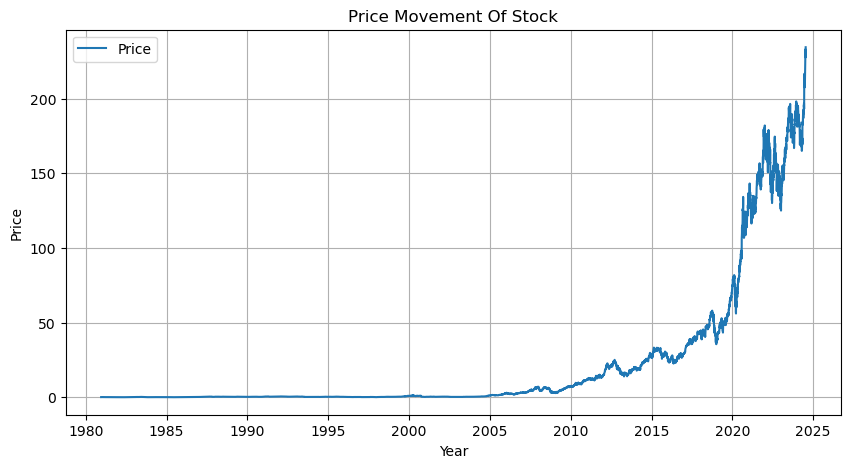

In [32]:
def plot_data(Stock_data):
    #plotting the price movements of a Stock from its startinig stage
    fig=plt.figure(figsize=(10, 5))
    plt.plot(Stock_data['Close'], label='Price')
    
    #setting up the title and labels
    plt.title("Price Movement Of Stock")
    plt.xlabel('Year')
    plt.ylabel('Price')
    
    plt.grid(True)
    
    plt.legend()
    plt.show()
    return fig
fig=plot_data(df)
#fig.show()

In [60]:
#creating the past 1 year data for plotting and observation of the Recent Trend
data_1y = df.iloc[-365:]  # yf.download(ticker_symbol, start=start_date,end=end_date, progress=False)

#reseting the date index for Plotting Price movements
data_1y.reset_index(drop=False, inplace=True)

#drop high-low,open-close
#data_1y = data_1y[["Date", "Open", "High", "Low", "Close",  "Volume"]]

print(data_1y.tail())

          Date        Open        High         Low       Close    Volume  \
360 2024-07-09  227.929993  229.399994  226.369995  228.679993  48076100   
361 2024-07-10  229.300003  233.080002  229.250000  232.979996  62627700   
362 2024-07-11  231.389999  232.389999  225.770004  227.570007  64710600   
363 2024-07-12  228.919998  232.639999  228.679993  230.539993  53008200   
364 2024-07-15  236.479996  237.229996  233.089996  234.399994  62549700   

     Open-Close  High-Low  
360   -0.750000  3.029999  
361   -3.679993  3.830002  
362    3.819992  6.619995  
363   -1.619995  3.960007  
364    2.080002  4.139999  


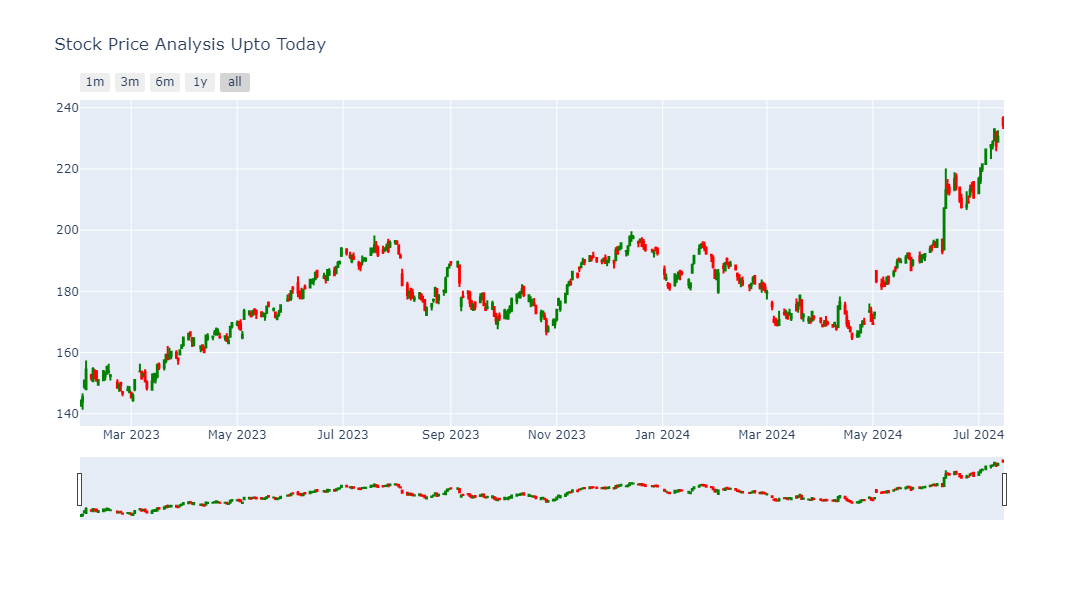

In [59]:

#plotting the data in Candlesticks which is differntiates the Increase and decrease in price
#interactive plotting using plot3d
figure = go.Figure(data=[go.Candlestick(x=data_1y["Date"],
                                        open=data_1y["Open"], 
                                        high=data_1y["High"],
                                        low=data_1y["Low"], 
                                        close=data_1y["Close"],
                                        increasing_line_color='green', 
                                        decreasing_line_color='red',
                                        increasing_fillcolor='green',
                                        decreasing_fillcolor='red')])

#slider can be used to select the range of price movements
figure.update_layout(title = " Stock Price Movement Upto Today", xaxis_rangeslider_visible=False)

#updating layouts with custom size of a PLot
figure.update_layout(title = "Stock Price Analysis Upto Today", 
                     xaxis_rangeslider_visible=True,height=600,width=1150)
#selecting particular time 1,3,6 and 1year using a rangeselector
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)


figure.show()

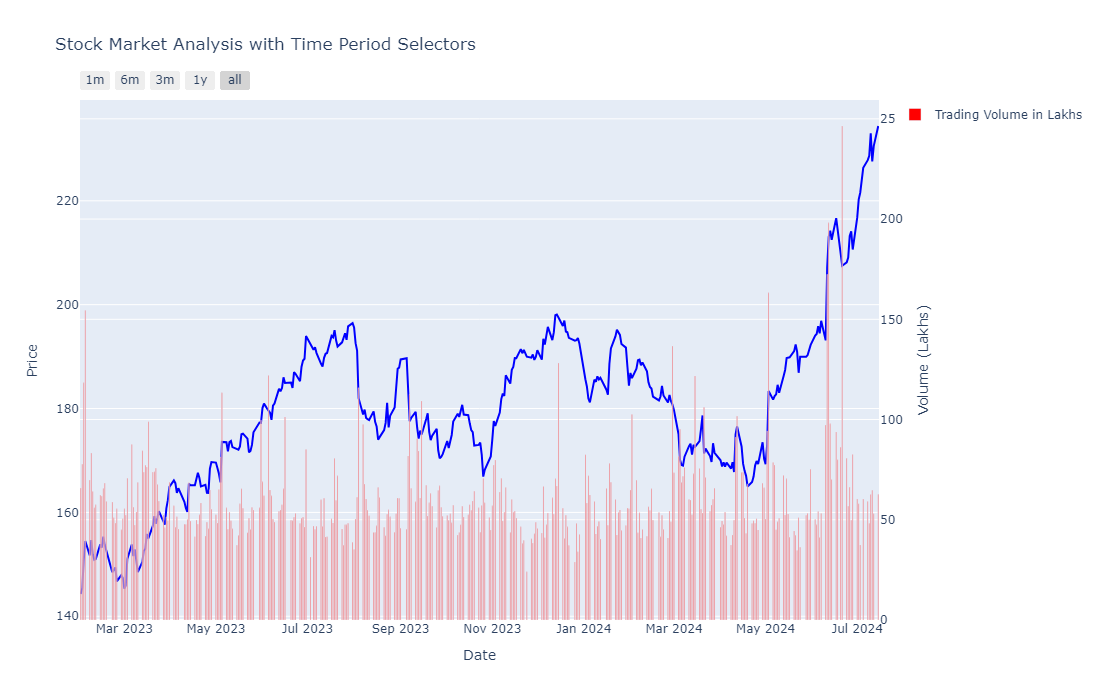

In [57]:
#line chart of date and close
figure = px.line(data_1y, x='Date', y='Close',title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Update trace to change line color
figure.update_traces(line=dict(color='blue'))

#plotting both 
figure.update_layout(yaxis2=dict(title="Price",overlaying='y',side="right"),height=700,width=1100)

#changing the volume in minimum amount for representtion
for i in range(1,data_1y.size):
    volume =data_1y["Volume"]/1000000

figure.add_trace(
    go.Bar(x=data_1y["Date"],  # X-axis data (dates)
    y=data_1y["Volume"] / 1000000,  # Y-axis data (volume in Lakhs)
    name="Trading Volume in Lakhs",  # Legend label
    marker=dict(color='red'),  # Specify the bar color here
    yaxis='y2'  # Use secondary y-axis for volume
))

figure.update_layout(
    yaxis=dict(title="Price"),  # Primary y-axis title
    yaxis2=dict(title="Volume (Lakhs)", overlaying='y', side="right"),  # Secondary y-axis title and position
    height=700,
    width=1100, #increasing the size of plotting
    bargap=0.5,  # Gap between bars
    bargroupgap=0.1,  # Gap between groups of bars
)

figure.show()
